First we will import all the libraries required for us to proceed our code

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Libraries imported.


Background:
Munich is the capital of second populous state 'Bavaria' in the german federal state.And it is the third largest city in the germany.As per the statistic of A total of 7.8 million guests were welcomed in the city, of which roughly 3.5 million were from abroad in year 2017.->Ref(https://www.statista.com/statistics/569562/key-figures-tourism-munich-germany/)
As Munich is populous city in the germany no. of tourist and localied population always search for the restaurants in the city.So we are going to find out restaurants cateogory wise.


In [2]:
address='Munich'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


We will have to configure clien_id & client_secret which we can get after creating new app in the foursquare site.We need this crendential to access the API.

In [114]:
CLIENT_ID = '34R3FO0DPWB1IFZJMP42SKPHAFDZCPWNADFTZZCGKFB52JLJ' #Foursquare ID
CLIENT_SECRET = '0JZ4CUA3ILSTO2CWNKNKDOROQLU4LKBM34C42EASYOFIBYG4'#Foursquare Client Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 34R3FO0DPWB1IFZJMP42SKPHAFDZCPWNADFTZZCGKFB52JLJ
CLIENT_SECRET:0JZ4CUA3ILSTO2CWNKNKDOROQLU4LKBM34C42EASYOFIBYG4


Now we'll merge all the required credential to fetch to the URL.And lets see the results.

In [123]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=34R3FO0DPWB1IFZJMP42SKPHAFDZCPWNADFTZZCGKFB52JLJ&client_secret=0JZ4CUA3ILSTO2CWNKNKDOROQLU4LKBM34C42EASYOFIBYG4&v=20180605&ll=48.1371079,11.5753822&radius=500&limit=100'

In [127]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cd7e1d2dd57972447478019'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hackenviertel',
  'headerFullLocation': 'Hackenviertel, Munich',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 244,
  'suggestedBounds': {'ne': {'lat': 48.1416079045, 'lng': 11.582112701333632},
   'sw': {'lat': 48.132607895499994, 'lng': 11.568651698666368}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ade0ccef964a520246921e3',
       'name': 'Marienplatz',
       'location': {'address': 'Marienplatz',
        'lat': 48.1371772513117,
        'lng': 11.57556064271456,
        'distance': 15,
        'postalCode': '80331',
        'cc': 'DE',
    

In [125]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [128]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561
1,Fischbrunnen,4b59e1fbf964a520189e28e3,Fountain,48.137211,11.576047
2,Alois Dallmayr,4ade0d22f964a520fa6a21e3,Gourmet Shop,48.138554,11.576750
3,Viktualienmarkt,4ade0d12f964a5209c6a21e3,Farmers Market,48.135296,11.576368
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776
5,St. Peter,4ade0cd2f964a520396921e3,Church,48.136530,11.575615
6,Kustermann,4b309b48f964a5206afa24e3,Department Store,48.136242,11.574897
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365
8,mymuesli Laden,4ee21e076c252ff3c5147aef,Organic Grocery,48.135357,11.576714
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556


In [129]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561
1,Fischbrunnen,4b59e1fbf964a520189e28e3,Fountain,48.137211,11.576047
2,Alois Dallmayr,4ade0d22f964a520fa6a21e3,Gourmet Shop,48.138554,11.576750
3,Viktualienmarkt,4ade0d12f964a5209c6a21e3,Farmers Market,48.135296,11.576368
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776
5,St. Peter,4ade0cd2f964a520396921e3,Church,48.136530,11.575615
6,Kustermann,4b309b48f964a5206afa24e3,Department Store,48.136242,11.574897
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365
8,mymuesli Laden,4ee21e076c252ff3c5147aef,Organic Grocery,48.135357,11.576714
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556


In [ ]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

In [130]:
nearby_venues['categories'].unique()

array(['Plaza', 'Fountain', 'Gourmet Shop', 'Farmers Market', 'Café',
       'Church', 'Department Store', 'Beer Garden', 'Organic Grocery',
       'Irish Pub', 'Hotel', 'Bavarian Restaurant', 'German Restaurant',
       'Bookstore', 'Coffee Shop', 'Electronics Store', 'Fish Market',
       'Restaurant', "Men's Store", 'Clothing Store',
       'Falafel Restaurant', 'Pizza Place', 'Boutique',
       'Italian Restaurant', 'Seafood Restaurant', 'Burger Joint',
       'Candy Store', 'Juice Bar', 'Wine Bar', 'Art Museum',
       'Opera House', 'Vegetarian / Vegan Restaurant', 'Snack Place',
       'Park', 'Cosmetics Shop', 'Shopping Mall', 'Monument / Landmark',
       'English Restaurant', 'Pub', 'Food Court', 'Cupcake Shop',
       'Soup Place', 'Paper / Office Supplies Store',
       'American Restaurant', 'Sandwich Place', 'Steakhouse',
       'Cocktail Bar', 'Market', 'Brewery', 'Sporting Goods Shop',
       'Argentinian Restaurant', 'Smoke Shop', 'Strip Club'], dtype=object)

In [ ]:
# creating a list of categories to remove from our dataframe because they are not restaurants


In [163]:
removal_list = ['Fountain','Gourmet Shop','Farmers Market','Church','Department Store','Organic Grocery',
                'Bookstore','Electronics Store','Fish Market','Men s Store','Clothing Store','Boutique',
                'Art Museum','Opera House','Cosmetics Shop','Shopping Mall','Monument / Landmark',
                'Paper / Office Supplies Store','Market','Sporting Goods Shop','Strip Club','Park']
                
nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556
10,Rindermarkt,4b2aa139f964a5209dac24e3,Plaza,48.136099,11.573915
11,Louis Hotel,4b03b59df964a5201d5022e3,Hotel,48.135792,11.575963
12,Andechser am Dom,4ade0ca0f964a5202a6821e3,Bavarian Restaurant,48.138302,11.573778
14,Nürnberger Bratwurst Glöckl am Dom,4b294373f964a520ed9b24e3,German Restaurant,48.138338,11.574180
16,ZWICKL Gastlichkeit am Viktualienmarkt,50143667e4b0c79e483256fd,German Restaurant,48.135240,11.577249
17,BAR ALPINA im Schuster,5beafff4db1d81002cc32bb8,Coffee Shop,48.136362,11.574146


In [164]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['4ade0ccef964a520246921e3',
 '4c65358a94160f47eab52e17',
 '4bbc6329afe1b7136d4d304b',
 '4b58d627f964a520d66d28e3',
 '4b2aa139f964a5209dac24e3',
 '4b03b59df964a5201d5022e3',
 '4ade0ca0f964a5202a6821e3',
 '4b294373f964a520ed9b24e3',
 '50143667e4b0c79e483256fd',
 '5beafff4db1d81002cc32bb8',
 '5aa40abaa22db77cd6026bf3',
 '5238825911d2715c80955a54',
 '54b93632498e7c86d18459ac',
 '4ade0d1ef964a520e26a21e3',
 '4b44c33ef964a52078fb25e3',
 '4b8bb1b6f964a52051a732e3',
 '4ff06f73f136e5332508001c',
 '4b6dcecdf964a520c3912ce3',
 '4b5f1e69f964a52022a729e3',
 '4b9a25e4f964a52052a135e3',
 '50a51f51e4b0d897c56d391f',
 '4c56c1852308be9afe84576c',
 '4b72ab38f964a52001832de3',
 '5602ea37498e7034baa6958e',
 '4ade0d26f964a5200d6b21e3',
 '4c31d79ded37a593c7dd6a03',
 '4ade0ca8f964a5205b6821e3',
 '4b55ecd5f964a520c8f627e3',
 '597c97405455b250bd3c1700',
 '585ae0fe45c3ed1e7dd99fa5',
 '4b7d9275f964a52079c72fe3',
 '4b4253fff964a520add125e3',
 '542ae936498e5abfe78e5b59',
 '56e15a45498eae4657e9617c',
 '5a02f12a9411

Now we'll import how many likes Venue ID got from the API

In [165]:
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[4266, 93, 368, 296, 102, 55, 423, 213, 135, 10, 16, 383, 90, 242, 640, 217, 110, 544, 92, 8, 105, 102, 88, 181, 10, 13, 353, 51, 9, 17, 174, 73, 25, 67, 9, 141, 12, 37, 286, 169, 56, 6, 568, 44, 10, 254, 68, 958, 9, 3755, 161, 50, 145, 44, 328, 124, 40, 220, 70, 234, 163, 13, 324, 65, 417, 12, 231, 280]


In [166]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

68
68


In [167]:
#let's make a copy of our initial dataframe just in case anything goes wrong

Munich_venues = nearby_venues2.copy()
Munich_venues.head()

,name,id,categories,lat,lng
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556
10,Rindermarkt,4b2aa139f964a5209dac24e3,Plaza,48.136099,11.573915


In [168]:
# add in the list of likes

Munich_venues['total likes'] = like_list
Munich_venues.head()

,name,id,categories,lat,lng,total likes
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561,4266
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776,93
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365,368
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556,296
10,Rindermarkt,4b2aa139f964a5209dac24e3,Plaza,48.136099,11.573915,102


In [169]:
# now let's bin total likes

print(Munich_venues['total likes'].max())
print(Munich_venues['total likes'].min())
print(Munich_venues['total likes'].median())
print(Munich_venues['total likes'].mean())

4266
6
103.5
277.55882352941177


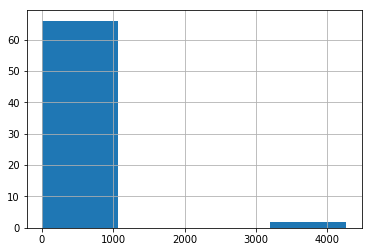

In [170]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
Munich_venues['total likes'].hist(bins=4)
plt.show()

In [171]:
# what are the bins we want to use?

print(np.percentile(Munich_venues['total likes'], 25))
print(np.percentile(Munich_venues['total likes'], 50))
print(np.percentile(Munich_venues['total likes'], 75))

43.0
103.5
245.0


In [172]:
# now we have our bin values so let's set them to the appropriate values
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = Munich_venues['total likes']<=24
below_avg = Munich_venues[(Munich_venues['total likes']>24) & (Munich_venues['total likes']<=45)]
abv_avg = Munich_venues[(Munich_venues['total likes']>45) & (Munich_venues['total likes']<=76)]
great = Munich_venues['total likes']>76

In [173]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

Munich_venues['total likes_cat']=Munich_venues.apply(conditions, axis=1)

In [161]:
Munich_venues

,name,id,categories,lat,lng,total likes
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561,4266
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776,93
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365,368
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556,296
10,Rindermarkt,4b2aa139f964a5209dac24e3,Plaza,48.136099,11.573915,102
11,Louis Hotel,4b03b59df964a5201d5022e3,Hotel,48.135792,11.575963,55
12,Andechser am Dom,4ade0ca0f964a5202a6821e3,Bavarian Restaurant,48.138302,11.573778,423
14,Nürnberger Bratwurst Glöckl am Dom,4b294373f964a520ed9b24e3,German Restaurant,48.138338,11.574180,213
16,ZWICKL Gastlichkeit am Viktualienmarkt,50143667e4b0c79e483256fd,German Restaurant,48.135240,11.577249,135
17,BAR ALPINA im Schuster,5beafff4db1d81002cc32bb8,Coffee Shop,48.136362,11.574146,10


In [174]:
Munich_venues['categories'].unique()

array(['Plaza', 'Café', 'Beer Garden', 'Irish Pub', 'Hotel',
       'Bavarian Restaurant', 'German Restaurant', 'Coffee Shop',
       'Restaurant', "Men's Store", 'Falafel Restaurant', 'Pizza Place',
       'Italian Restaurant', 'Seafood Restaurant', 'Burger Joint',
       'Candy Store', 'Juice Bar', 'Wine Bar',
       'Vegetarian / Vegan Restaurant', 'Snack Place',
       'English Restaurant', 'Pub', 'Food Court', 'Cupcake Shop',
       'Soup Place', 'American Restaurant', 'Sandwich Place',
       'Steakhouse', 'Cocktail Bar', 'Brewery', 'Argentinian Restaurant',
       'Smoke Shop'], dtype=object)

In [178]:
# let's create our new categories and create a function to apply those to our existing data


bars_breverages =['Smoke Shop','Brewery','Cocktail Bar','Pub','Wine Bar','Irish Pub','Beer Garden']
other =['Steakhouse','Soup Place','Cupcake Shop','Food Court','Candy Store','Coffee Shop','Hotel','Plaza','Café'] 
euro_indian_food =['English Restaurant','Vegetarian / Vegan Restaurant','Pizza Place','Restaurant','German Restaurant','Bavarian Restauran'] 
mex_southam_food = ['Snack Place','Burger Joint','Falafel Restaurant']
american_food = ['Argentinian Restaurant','American Restaurant']
italian_food = ['Sandwich Place','Seafood Restaurant','Italian Restaurant']


def conditions2(s):
    if s['categories'] in bars_breverages:
        return 'bars_breverages'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in euro_indian_food:
        return 'euro_indian_food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

Munich_venues['categories_new']=Munich_venues.apply(conditions2, axis=1)

In [179]:
Munich_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561,4266,great,other
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776,93,great,other
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365,368,great,bars_breverages
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556,296,great,bars_breverages
10,Rindermarkt,4b2aa139f964a5209dac24e3,Plaza,48.136099,11.573915,102,great,other
11,Louis Hotel,4b03b59df964a5201d5022e3,Hotel,48.135792,11.575963,55,avg avg,other
12,Andechser am Dom,4ade0ca0f964a5202a6821e3,Bavarian Restaurant,48.138302,11.573778,423,great,None
14,Nürnberger Bratwurst Glöckl am Dom,4b294373f964a520ed9b24e3,German Restaurant,48.138338,11.574180,213,great,euro_indian_food
16,ZWICKL Gastlichkeit am Viktualienmarkt,50143667e4b0c79e483256fd,German Restaurant,48.135240,11.577249,135,great,euro_indian_food
17,BAR ALPINA im Schuster,5beafff4db1d81002cc32bb8,Coffee Shop,48.136362,11.574146,10,poor,other


In [182]:
# one hot encoding
Munich_onehot = pd.get_dummies(Munich_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Munich_onehot['Name'] = Munich_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [Munich_onehot.columns[-1]] + list(Munich_onehot.columns[:-1])
Munich_onehot = Munich_onehot[fixed_columns]

Munich_onehot.head()

,Name,american food,bars_breverages,euro_indian_food,italian food,mex southam food,other,avg avg,below avg,great,poor
0,Marienplatz,0,0,0,0,0,1,0,0,1,0
4,Chocolaterie Beluga,0,0,0,0,0,1,0,0,1,0
7,Biergarten am Viktualienmarkt,0,1,0,0,0,0,0,0,1,0
9,Kilians,0,1,0,0,0,0,0,0,1,0
10,Rindermarkt,0,0,0,0,0,1,0,0,1,0


In [183]:
cluster_df = Munich_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 3, 1, 0, 0, 2])

In [184]:
Munich_venues['label'] = kmeans.labels_
Munich_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561,4266,great,other,1
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776,93,great,other,1
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365,368,great,bars_breverages,1
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556,296,great,bars_breverages,1
10,Rindermarkt,4b2aa139f964a5209dac24e3,Plaza,48.136099,11.573915,102,great,other,1


In [212]:
location=[latitude,longitude]
print(location)
map_clusters = folium.Map(location, zoom_start=13)
map_clusters

[48.1371079, 11.5753822]


In [215]:
location=[latitude,longitude]

map_clusters = folium.Map(location, zoom_start=13)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Munich_venues['lat'], Munich_venues['lng'], Munich_venues['name'], Munich_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]
[48.1371079, 11.5753822]


In [193]:
Munich_venues.loc[Munich_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
14,Nürnberger Bratwurst Glöckl am Dom,4b294373f964a520ed9b24e3,German Restaurant,48.138338,11.574180,213,great,euro_indian_food,0
16,ZWICKL Gastlichkeit am Viktualienmarkt,50143667e4b0c79e483256fd,German Restaurant,48.135240,11.577249,135,great,euro_indian_food,0
22,Augustiner Klosterwirt,5238825911d2715c80955a54,German Restaurant,48.138649,11.572527,383,great,euro_indian_food,0
28,LUX Restaurant & Bar,4ff06f73f136e5332508001c,Restaurant,48.137193,11.578747,110,great,euro_indian_food,0
30,Grano,4b5f1e69f964a52022a729e3,Pizza Place,48.135090,11.573765,92,great,euro_indian_food,0
33,Spezlwirtschaft,50a51f51e4b0d897c56d391f,German Restaurant,48.137486,11.578253,105,great,euro_indian_food,0
46,Zum Spöckmeier,4b7d9275f964a52079c72fe3,German Restaurant,48.136773,11.574078,174,great,euro_indian_food,0
51,Tian,542ae936498e5abfe78e5b59,Vegetarian / Vegan Restaurant,48.134471,11.575988,25,below avg,euro_indian_food,0
58,Restaurant Dallmayr,4b9500b8f964a520168b34e3,German Restaurant,48.138489,11.576791,37,below avg,euro_indian_food,0
64,The Victorian House am Viktualienmarkt,4b127ff7f964a5204d8a23e3,English Restaurant,48.134487,11.577549,169,great,euro_indian_food,0


In [194]:
Munich_venues.loc[Munich_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Marienplatz,4ade0ccef964a520246921e3,Plaza,48.137177,11.575561,4266,great,other,1
4,Chocolaterie Beluga,4c65358a94160f47eab52e17,Café,48.135750,11.575776,93,great,other,1
7,Biergarten am Viktualienmarkt,4bbc6329afe1b7136d4d304b,Beer Garden,48.135194,11.576365,368,great,bars_breverages,1
9,Kilians,4b58d627f964a520d66d28e3,Irish Pub,48.138720,11.574556,296,great,bars_breverages,1
10,Rindermarkt,4b2aa139f964a5209dac24e3,Plaza,48.136099,11.573915,102,great,other,1
12,Andechser am Dom,4ade0ca0f964a5202a6821e3,Bavarian Restaurant,48.138302,11.573778,423,great,None,1
23,Kaffeerösterei Viktualienmarkt,54b93632498e7c86d18459ac,Coffee Shop,48.134732,11.576193,90,great,other,1
24,Hirmer,4ade0d1ef964a520e26a21e3,Men's Store,48.138023,11.572046,242,great,None,1
25,Schneider Bräuhaus,4b44c33ef964a52078fb25e3,Bavarian Restaurant,48.136378,11.578446,640,great,None,1
27,Sababa,4b8bb1b6f964a52051a732e3,Falafel Restaurant,48.134748,11.577250,217,great,mex southam food,1


In [195]:
Munich_venues.loc[Munich_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
17,BAR ALPINA im Schuster,5beafff4db1d81002cc32bb8,Coffee Shop,48.136362,11.574146,10,poor,other,2
21,Leger am Dom,5aa40abaa22db77cd6026bf3,Restaurant,48.138262,11.572932,16,poor,euro_indian_food,2
32,Due Passi,4b9a25e4f964a52052a135e3,Italian Restaurant,48.137194,11.578709,8,poor,italian food,2
39,Elly Seidl,4ade0d26f964a5200d6b21e3,Candy Store,48.139410,11.575512,10,poor,other,2
40,Schenk's frischgepresste Säfte,4c31d79ded37a593c7dd6a03,Juice Bar,48.134753,11.576494,13,poor,None,2
44,La Piazza,597c97405455b250bd3c1700,Italian Restaurant,48.134408,11.574506,9,poor,italian food,2
45,Grapes Weinbar,585ae0fe45c3ed1e7dd99fa5,Wine Bar,48.136930,11.579391,17,poor,bars_breverages,2
53,Caspar Plautz,5a02f12a9411f217c4079100,Snack Place,48.134683,11.576058,9,poor,mex southam food,2
56,Hotel am Markt,4ade0c94f964a520ec6721e3,Hotel,48.135427,11.577078,12,poor,other,2
66,MONACO Café & franzmünchinger SHOP,59662f37b8fd9d4e19b75f9d,Coffee Shop,48.137049,11.576329,6,poor,other,2


In [196]:
Munich_venues.loc[Munich_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
11,Louis Hotel,4b03b59df964a5201d5022e3,Hotel,48.135792,11.575963,55,avg avg,other,3
43,Cortiina Hotel,4b55ecd5f964a520c8f627e3,Hotel,48.136804,11.579450,51,avg avg,other,3
48,Platzl Hotel,4b4253fff964a520add125e3,Hotel,48.137823,11.578919,73,avg avg,other,3
52,Bite Delite,56e15a45498eae4657e9617c,Café,48.139996,11.575072,67,avg avg,other,3
65,Ned Kelly's Australian Bar,4b0ec98af964a520075b23e3,Pub,48.138632,11.574618,56,avg avg,bars_breverages,3
72,Münchner Suppenküche,4b48907df964a520734f26e3,Soup Place,48.134760,11.576290,68,avg avg,other,3
78,Bar Tabacco,4b74556cf964a520ddd52de3,Cocktail Bar,48.139715,11.572672,50,avg avg,bars_breverages,3
87,Cafe Fräulein,4c5f2bbe832fa59389eaecd3,Café,48.134487,11.578152,70,avg avg,other,3
92,El Gaucho,540a202b498ed28daa9363b3,Argentinian Restaurant,48.134512,11.577664,65,avg avg,american food,3
